In [26]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [27]:
data = pd.read_csv('diabetes.csv')  # Replace 'pima_dataset.csv' with the actual path to your dataset
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


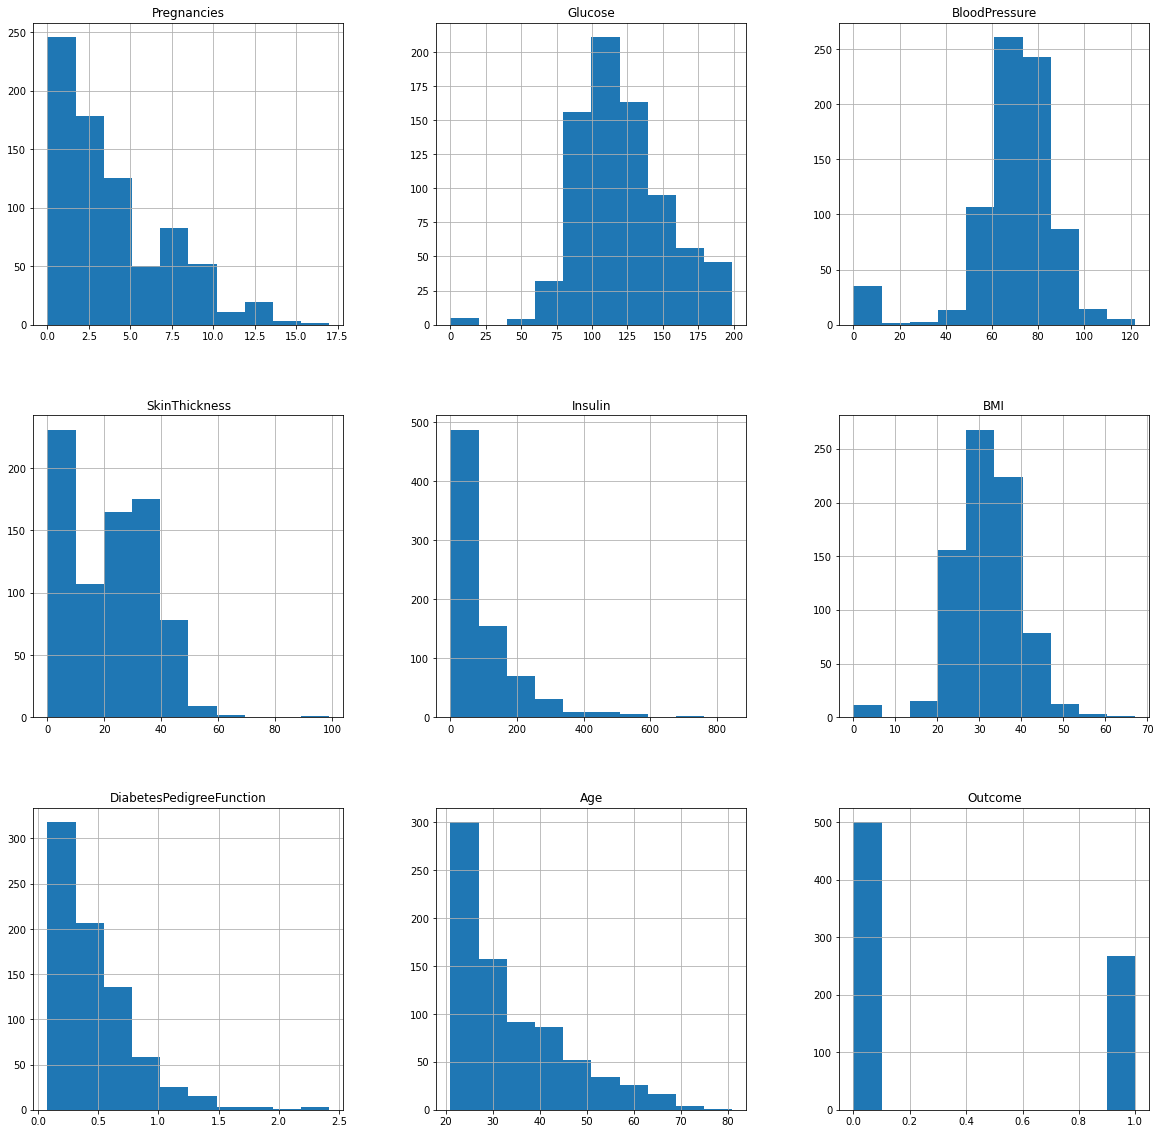

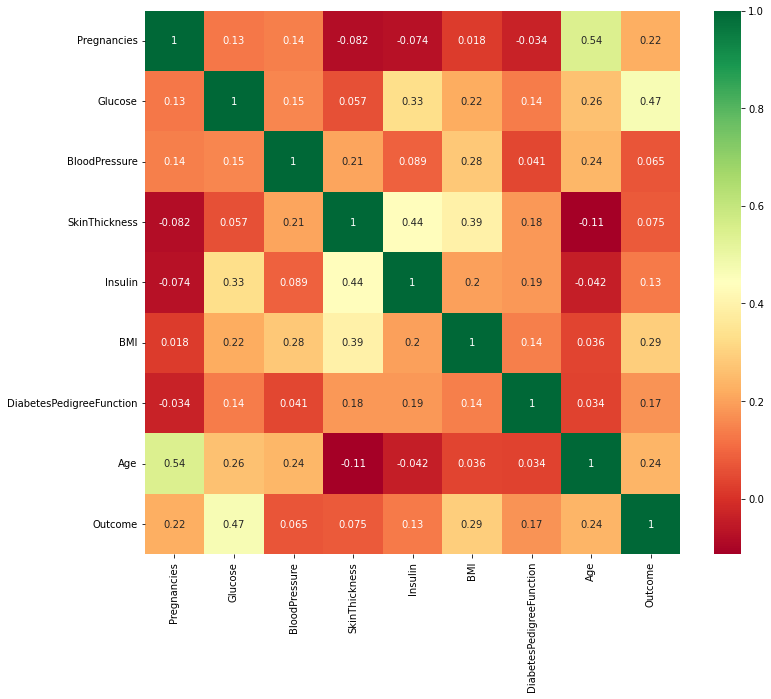

In [28]:

diabetes_df = pd.read_csv('diabetes.csv')
#Data Visualization
p = diabetes_df.hist(figsize = (20,20))
plt.figure(figsize=(12,10))
p = sns.heatmap(diabetes_df.corr(), annot=True,cmap ='RdYlGn')

In [29]:
data['glu_out']=(data['Outcome'])*(data['Glucose'])
# diabetes_df['preg_age']=diabetes_df['Pregnancies']*diabetes_df['Age']
X = data.drop(['Outcome','Glucose'], axis=1)
y = data['Outcome']


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [32]:
pca = PCA(n_components=5)  
X_pca = pca.fit_transform(X_scaled)


In [33]:
X_pca


array([[-1.35392802,  1.34768232,  0.53963865, -0.24465874, -0.3261668 ],
       [ 0.96693838, -0.64805593, -0.51247704,  0.27276513, -0.06513669],
       [ 0.39570033,  1.69544111,  1.75468295, -0.45495688, -0.40124334],
       ...,
       [ 0.58284262, -0.05712198, -0.63821481,  0.39832504,  0.86829544],
       [ 0.71094892,  1.07058315,  0.77775131, -0.94534098, -0.53263337],
       [ 0.78143935, -1.10726192, -0.83765169, -0.06257868, -0.28834719]])

In [34]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=7)


In [36]:
ann_model = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=7)
ann_model.fit(X_train, y_train)
ann_predictions = ann_model.predict(X_test)
ann_accuracy = accuracy_score(y_test, ann_predictions)
print("ACCURACY OF ANN Model:",ann_accuracy*100)

ACCURACY OF ANN Model: 98.7012987012987


In [37]:

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

bn = GaussianNB()

In [38]:
bn.fit(X_train, y_train)
bn_predictions = bn.predict(X_test)
bn_accuracy = accuracy_score(y_test, bn_predictions)
print("ACCURACY OF BN Model:",bn_accuracy*100)

ACCURACY OF BN Model: 89.6103896103896


In [39]:
# Create a voting classifier that ensembles the Bayesian belief network and the ANN
ensemble = VotingClassifier(estimators=[('bn', bn), ('ann', ann_model)], voting='hard')

# Train the ensemble model
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('bn', GaussianNB()),
                             ('ann',
                              MLPClassifier(hidden_layer_sizes=(10, 10),
                                            max_iter=1000, random_state=7))])

In [40]:
# Evaluate the ensemble model on the test set
ensemble_predictions = ensemble.predict(X_test)
accuracy = np.mean(ensemble_predictions == y_test)
print('Accuracy of ENSEMBLE:', accuracy*100)

Accuracy of ENSEMBLE: 94.15584415584416


In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score,confusion_matrix
ann_precision = precision_score(y_test, ann_predictions)
ann_recall = recall_score(y_test, ann_predictions)
ann_f1 = f1_score(y_test, ann_predictions)
bn_precision = precision_score(y_test, bn_predictions)
bn_recall = recall_score(y_test, bn_predictions)
bn_f1 = f1_score(y_test, bn_predictions)
ensemble_precision = precision_score(y_test, ensemble_predictions)
ensemble_recall = recall_score(y_test, ensemble_predictions)
ensemble_f1 = f1_score(y_test, ensemble_predictions)
print("Metrics for ANN Model:")
print("Precision:", ann_precision)
print("Recall:", ann_recall)
print("F1-score:", ann_f1)
print("\nMetrics for Gaussian Naive Bayes Model (bn):")
print("Precision:", bn_precision)
print("Recall:", bn_recall)
print("F1-score:", bn_f1)
print("\nMetrics for Ensemble Model:")
print("Precision:", ensemble_precision)
print("Recall:", ensemble_recall)
print("F1-score:", ensemble_f1)


Metrics for ANN Model:
Precision: 1.0
Recall: 0.9649122807017544
F1-score: 0.9821428571428572

Metrics for Gaussian Naive Bayes Model (bn):
Precision: 0.8596491228070176
Recall: 0.8596491228070176
F1-score: 0.8596491228070176

Metrics for Ensemble Model:
Precision: 1.0
Recall: 0.8421052631578947
F1-score: 0.9142857142857143


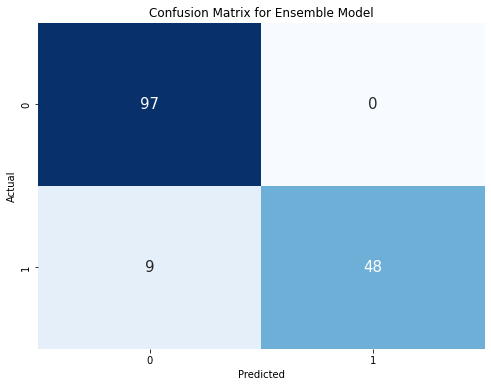

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        97
           1       1.00      0.84      0.91        57

    accuracy                           0.94       154
   macro avg       0.96      0.92      0.93       154
weighted avg       0.95      0.94      0.94       154



In [42]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix for the ensemble model
cm = confusion_matrix(y_test, ensemble_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,annot_kws={"fontsize": 15})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Ensemble Model')
plt.show()

# Classification report for the ensemble model
print('Classification Report:')
print(classification_report(y_test, ensemble_predictions))


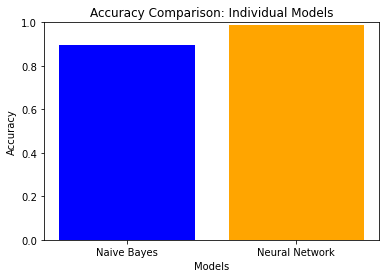

In [43]:
# Calculate individual model accuracies
individual_accuracies = [accuracy_score(y_test, bn.predict(X_test)), ann_accuracy]

# Create a bar chart
models = ['Naive Bayes', 'Neural Network']
plt.bar(models, individual_accuracies, color=['blue', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: Individual Models')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 (as accuracy ranges from 0 to 1)
plt.show()



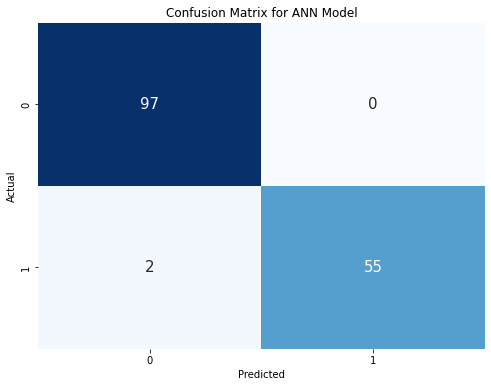

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        97
           1       1.00      0.84      0.91        57

    accuracy                           0.94       154
   macro avg       0.96      0.92      0.93       154
weighted avg       0.95      0.94      0.94       154



In [44]:
cm = confusion_matrix(y_test, ann_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,annot_kws={"fontsize": 15})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for ANN Model')
plt.show()

# Classification report for the ensemble model
print('Classification Report:')
print(classification_report(y_test, ensemble_predictions))

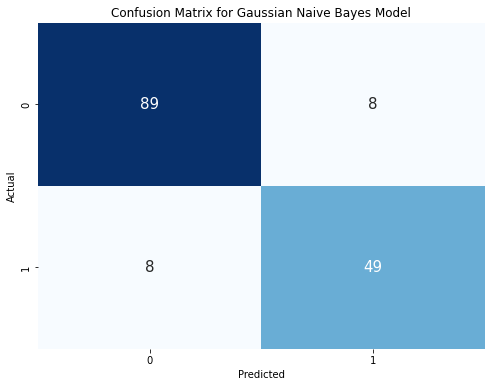

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        97
           1       1.00      0.84      0.91        57

    accuracy                           0.94       154
   macro avg       0.96      0.92      0.93       154
weighted avg       0.95      0.94      0.94       154



In [45]:
cm = confusion_matrix(y_test, bn_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,annot_kws={"fontsize": 15})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gaussian Naive Bayes Model')
plt.show()

# Classification report for the ensemble model
print('Classification Report:')
print(classification_report(y_test, ensemble_predictions))

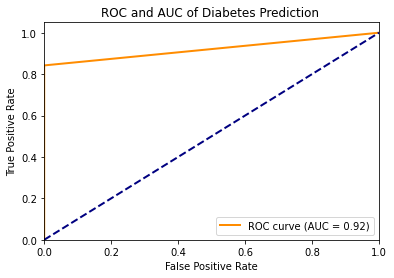

AUC: 0.9210526315789473


In [47]:
from sklearn.metrics import roc_curve, auc
y_pred = ensemble.predict(X_test)

# Calculate ROC curve for the ensemble model
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Calculate AUC for the ensemble model
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC and AUC of Diabetes Prediction ')

plt.legend(loc='lower right')
plt.show()

print('AUC:', roc_auc)